<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/math/math_optimisation_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disclaimer

* Content of this notebook is for my personal learning. 
* I currently use a repository of Python notebooks as my knowledge management system, it is like some people use note taking apps with the added benefit of interactivity and ability to programatically play with the concepts, ideas and data in order to deepen the understanding and strengthen the recall.  
* Any opinions or ideas expressed here are on my own behalf and do not represent my employer.
* Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.
* Content starts from the section [Header](#cell-header).


## Code Set Up

In [17]:
#@title Imports {display-mode: "form"}
import sys
import os
import platform
import random
import itertools
import math
import datetime

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Rectangle
import seaborn as sns

# reading google sheets files
import gspread
from oauth2client.client import GoogleCredentials

from collections import OrderedDict
from typing import List, Optional

# print versions
print (f"system: {sys.version}")
print (f"pandas: {pd.__version__}")
print (f"numpy: {np.__version__}")

system: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas: 1.1.5
numpy: 1.19.5


In [2]:
# @title Dislay settings  {display-mode: "form"} 
sns.set(context='notebook', style="whitegrid", rc={"figure.figsize": (20, 10)})
pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", 200)

### Helper functions and snippets

Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.

In [3]:
# @title Generate Report header with meta information {display-mode: "form"} 
def generate_header(author: Optional[str] = 'szczecinski',
                    title: Optional[str] = 'unknown',
                    description: Optional[str] = 'unknown',
                    prepared_for: Optional[str] = 'learning',
                    tags: Optional[List[str]] = [''],
                    links: Optional[List[str]] = ['']):
    """
    Generates standardised header with meta information describing the report.
    
    Args:
      author: Name of the author.
      title: Title of the report.
      description: Text describing the report.
      prepared_for: Text providing context and purpose of generating the report.
      tags: List of tags for searching.
      links: List of links for reference and cross linking.

    Returns:
      df_meta: Formatted Pandas Dataframe with meta information of the report.
    """
    meta_dict = OrderedDict()

    # Properties provided by author.
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)
    meta_dict['links'] = str(links)

    # Properties auto generated by the system.
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['report_information']).T
    return df_meta

In [4]:
# @title Using R  {display-mode: "form"} 
# loading in case want to write R code
%load_ext rpy2.ipython
# example R code

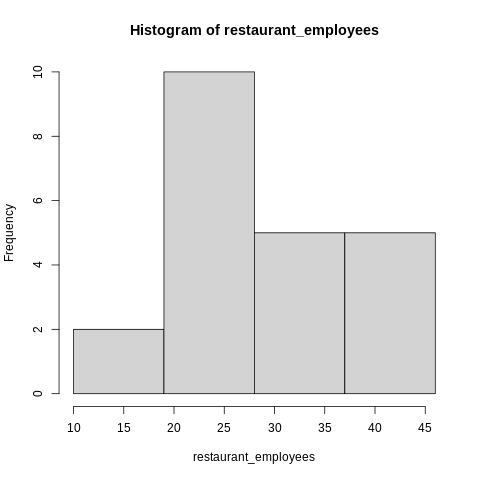

In [5]:
%%R
restaurant_employees <- c(22, 35, 15, 26, 40, 28, 18, 20, 25, 34, 39, 42, 24, 22, 19, 27, 22, 34, 40, 20, 38, 28)
hist(restaurant_employees, breaks=c(10,19,28,37,46), right=FALSE)

#### Loading data from gsheet

In [6]:
# @title Google Authentication {display-mode: "form"}
# from google.colab import auth
# auth.authenticate_user()

In [7]:
# @title {display-mode: "form"} 
# importing data from google sheet
def get_data_gsheet(name='data_jobs_summary'):
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  worksheet = gc.open(name).sheet1
  # get_all_values gives a list of rows.
  rows = worksheet.get_all_values()
  header = rows[0]
  df_data = pd.DataFrame.from_records(data=rows[1:], columns=header)
  return df_data

# df = get_data_gsheet()

In [8]:
# @title {display-mode: "form"} 
def generate_header(author='unknown', title='unknown', description ='unknown', prepared_for='unknown', tags=''):
    """
    desc: generates standard header with meta information describing report
    input: author, title, description, prepared_for, tags
    output: rendering formatted dataframe with report details
    """
    meta_dict = OrderedDict()

    # properties to fill
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)

    # auto generated
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['meta_information']).T
    return df_meta

#### Plotting for math

In [9]:
# @title {display-mode: "form"} 
def create_spine_plane(ax, title='title'):
  """
  adds cartesian plane 
  to the background of the plot
  """
  ax.set_title(title)
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  return ax

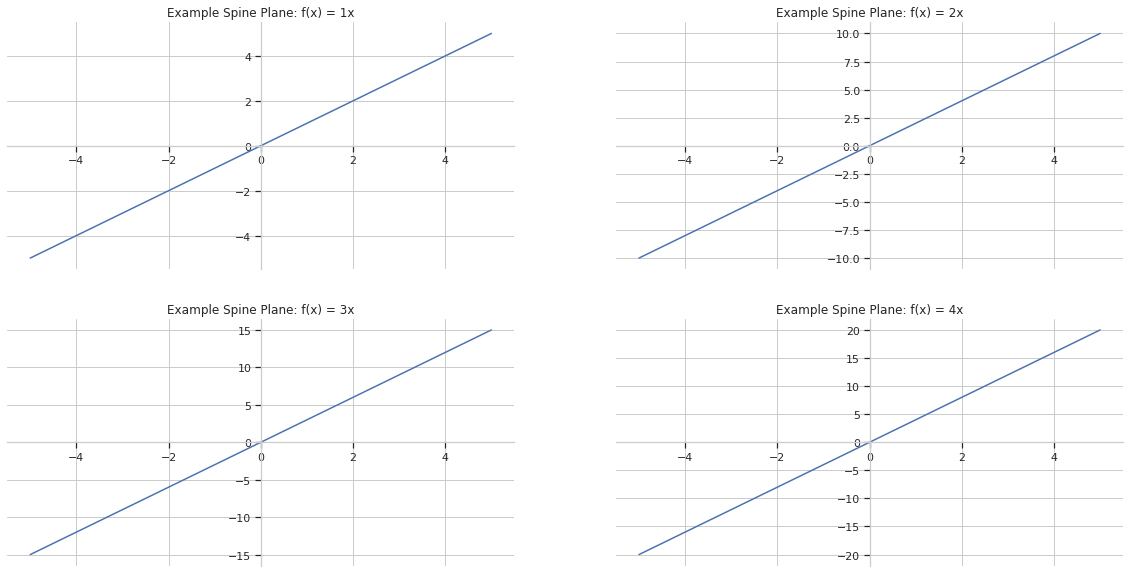

In [10]:
# @title {display-mode: "form"} 
# showing demo function on a plane
fig = plt.figure()

# define grid here
subplot_grid_x = 2
subplot_grid_y = 2

x = [x for x in np.arange(-5,6)]

for i in range(4):
  # function definition
  y = [(i+1) * xi for xi in x]
  ax = fig.add_subplot(subplot_grid_x, subplot_grid_y, i+1)
  ax = create_spine_plane(ax, title=f"Example Spine Plane: f(x) = {i+1}x");
  ax.plot(x, y);

In [11]:
# @title {display-mode: "form"} 
def plot_shapes():
  """
  plot example shapes - circle and lines
  """
  plt.axes()
  circle = plt.Circle((0,0),1, facecolor='None',edgecolor='blue')
  plt.gca().add_patch(circle)
  line1 = plt.Line2D((0, 1), (0, 0), linewidth=1.5, linestyle='--', color = 'black')
  line2 = plt.Line2D((0, 1), (0, 0), linewidth=1.5, linestyle='--', color = 'black')

  plt.gca().add_line(line1)
  plt.axis('scaled')
  return plt


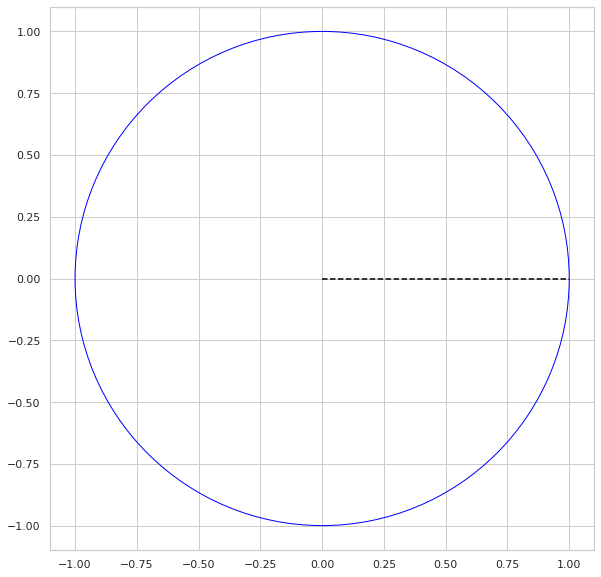

In [12]:
plot_shapes();

### Handy Links

[Altair guide](https://altair-viz.github.io/getting_started/overview.html#)

<a name="cell-header"></a>
# Header: Title and metadata

In [13]:
# setting up header info
author = 'Michal Szczecinski'
prepared_for ='learning'
title = 'Title'
description = 'Description'
tags = ['#data-driven', '#math', '#stats']
links = ['']
generate_header(author=author,
                title=title,
                description=description,
                prepared_for=prepared_for,
                tags=tags,
                links=links)

TypeError: ignored

## Context

### Problem

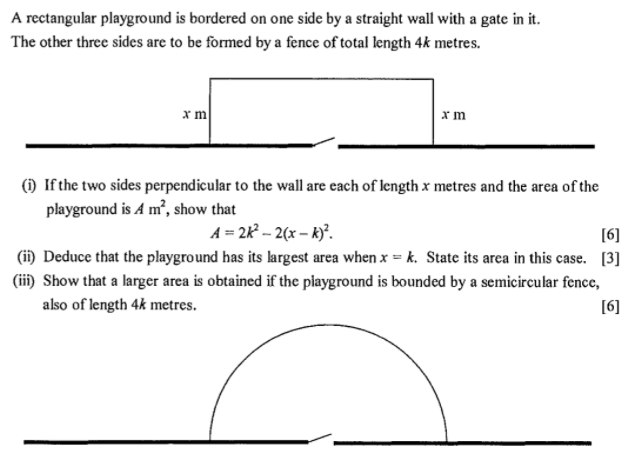

### Objectives

1. Simulate various configurations of rectangle and semi-circles and show if larger area is obtained by bounding playground using a semicircular fence. 
1. Show that the playground has the largest area when height = k. 
1. Simulate problem for different functions of fance and different values of k.
1. Draw functions for all k with constrain lines.


## Configuration

In [16]:
# paramater describing constant in fence function, for example fence = 4*k
a = 4
# parameter k describing fence
k = 5

# parameters for generating height values (x meters)
min = 1
max = 50
step = 1

## Initiating data

In [24]:
fence = a * k
heights = list(range(min, max, step))
df = pd.DataFrame(data={
    'param_a': a,
    'param_min':min,
    'param_max': max,
    'param_step': step,
    'param_k': k,
    'fence': fence,
    'height':heights})
df['width'] = df['height'].apply(lambda x: fence - 2 * x)
df

,param_a,param_min,param_max,param_step,param_k,fence,height,width
0,4,1,50,1,5,20,1,18
1,4,1,50,1,5,20,2,16
2,4,1,50,1,5,20,3,14
3,4,1,50,1,5,20,4,12
4,4,1,50,1,5,20,5,10
5,4,1,50,1,5,20,6,8
6,4,1,50,1,5,20,7,6
7,4,1,50,1,5,20,8,4
8,4,1,50,1,5,20,9,2
9,4,1,50,1,5,20,10,0


In [25]:
# using only positive values for side
df_positive = df[df['width']>0]
df_positive

,param_a,param_min,param_max,param_step,param_k,fence,height,width
0,4,1,50,1,5,20,1,18
1,4,1,50,1,5,20,2,16
2,4,1,50,1,5,20,3,14
3,4,1,50,1,5,20,4,12
4,4,1,50,1,5,20,5,10
5,4,1,50,1,5,20,6,8
6,4,1,50,1,5,20,7,6
7,4,1,50,1,5,20,8,4
8,4,1,50,1,5,20,9,2


### Plotting shapes

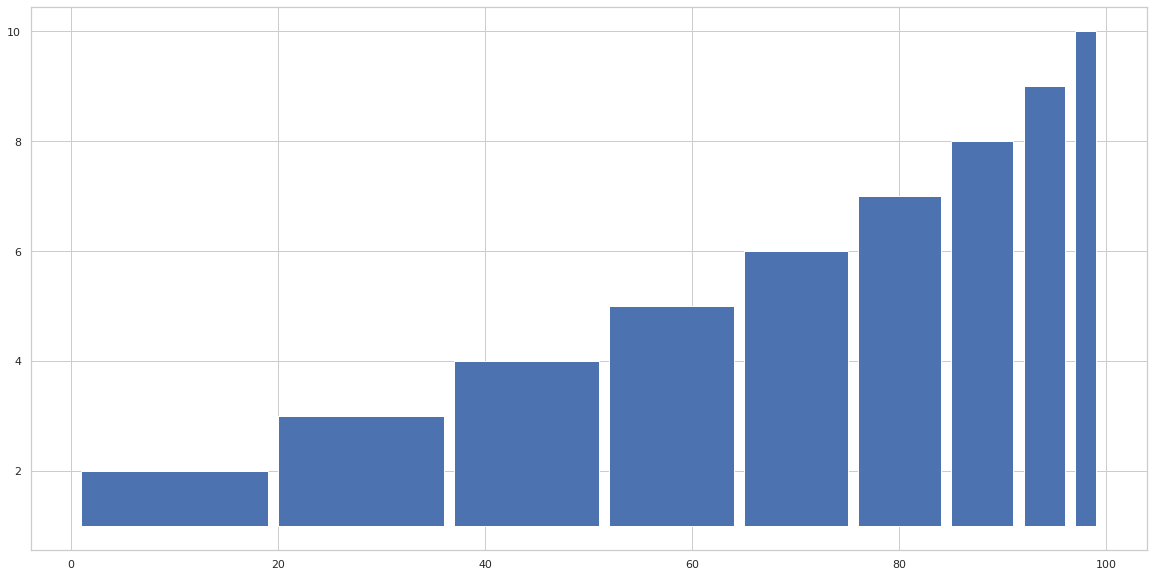

In [23]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot()

#add rectangle to plot
start = 1
last_x = 0
for index, row in df_positive.iterrows():
  width = row['width']
  height = row['height']
  ax.add_patch(Rectangle((start + last_x, 1), width=width, height=height))
  last_x += width +1

# #display plot
# plt.show()

### Creating semicircular fence

arc_length = 4k   
4k = (2*pi*r)/2      // divide by 2 because its semi-circle
8k = 2*pi * r<br>
r = 8k/(2*pi)<br>
r = 4k/pi<br>

r = width/2<br>
width = 2*r = 8k/pi<br>




In [70]:
df['semicircle_width'] = (8 * df['param_k'])/math.pi #looks like it does not depend on heights, just the fence area or k
df

,param_a,param_min,param_max,param_step,param_k,fence,height,width,semicircle_width
0,4,1,50,1,5,20,1,18,12.732
1,4,1,50,1,5,20,2,16,12.732
2,4,1,50,1,5,20,3,14,12.732
3,4,1,50,1,5,20,4,12,12.732
4,4,1,50,1,5,20,5,10,12.732
5,4,1,50,1,5,20,6,8,12.732
6,4,1,50,1,5,20,7,6,12.732
7,4,1,50,1,5,20,8,4,12.732
8,4,1,50,1,5,20,9,2,12.732
9,4,1,50,1,5,20,10,0,12.732


In [71]:
semicircle_width = df['semicircle_width'][0]
semicircle_width

12.732395447351628

(-7.002817496043395, 7.002817496043395, -7.002817496043395, 7.002817496043395)

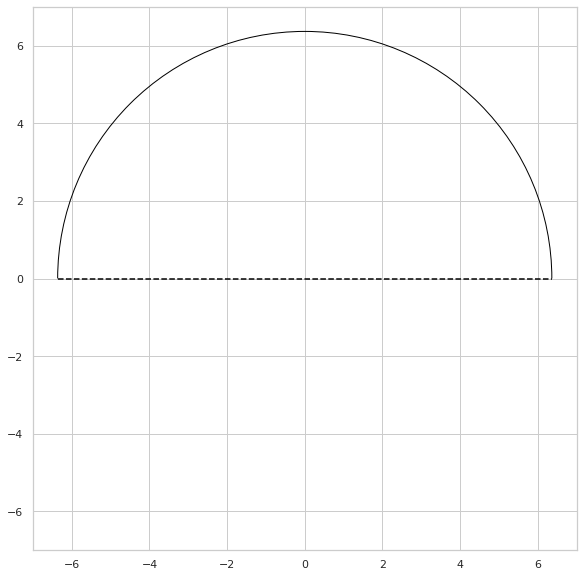

In [75]:
fig, ax = plt.subplots()

Arc = patches.Arc((0,0), semicircle_width,semicircle_width, angle=0, theta1=0, theta2=180,edgecolor='black')
line1 = plt.Line2D((0-semicircle_width/2, 0+semicircle_width/2), (0, 0), linewidth=1.5, linestyle='--', color = 'black')

ax.add_patch(Arc)
ax.add_line(line1)
# ax.add_patch(line1)
plt.axis('scaled')

In [ ]:
## TODO: draw semircirles for different k and compare to the rectangles
# - draw them at one plot, could just draw the circle at the plot of rectangles

In [76]:

# Arc = patches.Arc((1,1), 5,5, angle=0, theta1=0, theta2=180,edgecolor='black')
# plt.gca().add_patch(Arc)
# line1 = plt.Line2D(xdata=(1, 6), ydata=(1, 1), linewidth=1.5, linestyle='--', color = 'black')
# plt.gca().add_line(line1)
# plt.axis('scaled')

In [37]:
!pip install basic_units

ERROR: Could not find a version that satisfies the requirement basic_units (from versions: none)
ERROR: No matching distribution found for basic_units


In [38]:
# from basic_units import cm
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt


xcenter, ycenter = 0.38, 0.52
width, height = 1e-1, 3e-1
angle = -30

theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)

rtheta = np.radians(angle)
R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])


x, y = np.dot(R, [x, y])
x += xcenter
y += ycenter

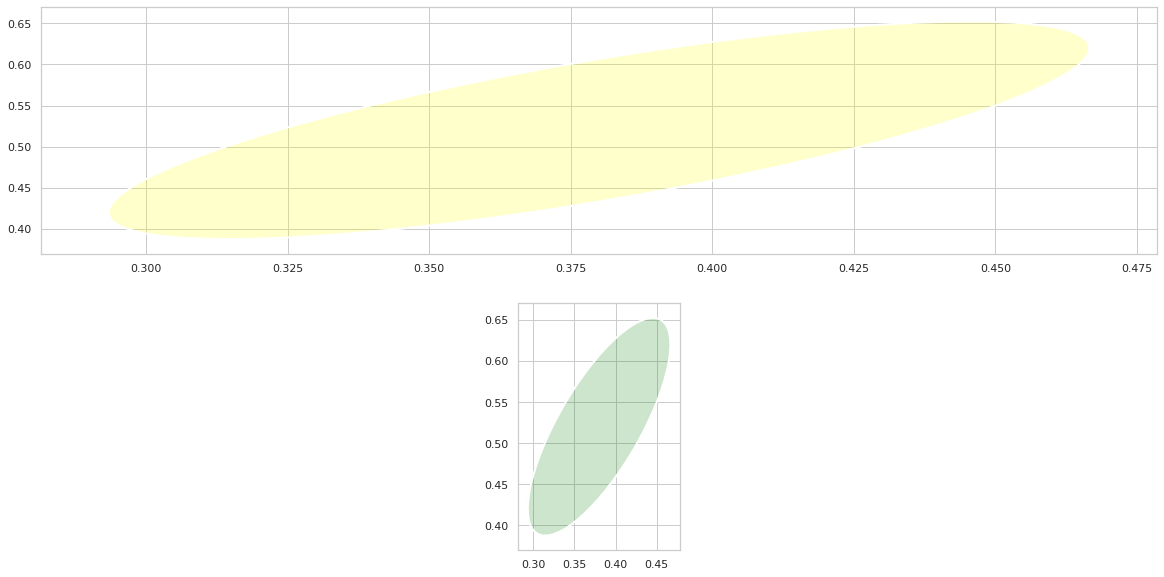

In [39]:
fig = plt.figure()
ax = fig.add_subplot(211, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('ellipse_compare')

###

## II

###

###

###

## III

### 

### 

### 

## References